<font size="4" face="verdana" color="red"> Brainery Byte
<hr></font>
<font size="6" face="Arial" color="blue"> <b>zeroLength Elements in OpenSees: </font><br><br>
    <font size="8" face="Arial" color="blue">Local Axes and User-Defined Orientation</b> <br>
    <br>
<br>
</font><p>

<font size="4" face="verdana" color="black">
 R211231 <br>
 Bijan Sayyafzadeh & Silvia Mazzoni,  2021 <br><br>
    b.sayyaf@yahoo.com, silviamazzoni@yahoo.com
<br><br><br>
The objective of this workbook is to provide a better understanding of the orientation of the local axes of the zeroLength elements in OpenSees and how to use the -orient option. Two examples are provided: one in 2D and one in 3D<br>
    <p>
</font><p>
<font size="2" face="verdana" color="black">    
Because we are working in Binder, and Binder sessions are meant to be ephemeral, it is not possible for you to save any changes you make to your Jupyter Notebook. If you do make changes or notes, you will need to download the notebook to your own computer by clicking File > Download as > Notebook (.ipynb). The only way you will be able to run these is if you have the appropriate software to run Jupyter Notebooks in Python and pip install OpenSeesPy and eSEESminiPy in your Python configuration. You may view my videos on how to install Anaconda, Jupyter Notebooks and OpenSeesPy (https://www.youtube.com/c/silviasbrainery).
    
This Code has been developed by Bijan Sayyafzadeh & Silvia Mazzoni. Please acknowledge this in your scripts, when applicable
    </font><p>

## Problem definition:

ZeroLength elements in OpenSees are elements with no length and consequently no obvious direction, so it is important that user define his purpose direction for Opensees.<br>
The number of degrees of freedom for this element are defined by the -ndf flag in the OpenSees Model Builder. <br>
In a 3D system (ndm = 3) with 6 DOF/node (ndf=6) a zero-length element has 3 translational DOFS and three rotational DOF. By default, the primary tranlational DOFs (or primary element axes) are oriented along the global X,Y, and Z axes.<br>
When the zeroLength element is used at the end of a beam-column element, however, the user may want to line the primary axes/DOFs of the zeroLenth element with those of the beam-column element. <br>
Imagine that zero length element has an imaginary direction and then take a look at the below image:

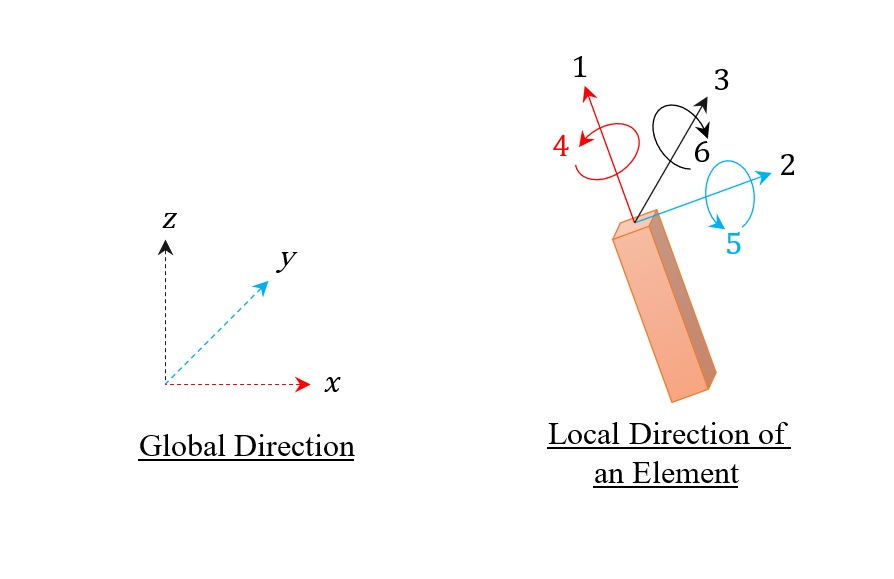

**How can we define the 1-2-3 local axis for the element in Opensees?** <br>
The user-defined orientation of the element axes can be defined using the optional <-orient> flag in the input command where you define the orientation of the DOF-1 (=x) and DOF-2 (=y) axes: <br>
<li> element('zeroLength', eleTag, *eleNodes, '-mat', *matTags, '-dir', *dirs, <'-doRayleigh', rFlag=0>, <b><'-orient', *vecx, *vecyp></b>)</li>
    where:
    <li> <b> vecx</b> a list of vector components in global coordinates defining local x-axis (optional)</li>
<li> <b>vecyp</b>: a list of vector components in global coordinates defining vector yp which lies in the local x-y plane for the element. (optional) </li>

The vecx vector needs to be defined exactly parallel to the DOF-1 axis of the zeroLength element. The vecyp vector can be any vector that is parallel to a plane defined by the DOF-1 and DOF-2 (x and y) axes of the element. OpenSees will take the cross product of vecx and vecyp to define the DOF-3 (z) axis of the element. It will then take the cross product of the DOF-3 and DOF-1 axes to compute the exact DOF-2 axis of the element.



In [ ]:
import openseespy.opensees as ops
import eSEESminiPy as slv # eSEESminiPy Python Package by Dr. **Silvia Mazzoni** has been used for plotting.
import math
import matplotlib.pyplot as plt
import plotly.express as exp
%matplotlib notebook
import BraineryWiz as bz
     

def PerformAnalysis():
    '''
    This Function is set to run analysis
    '''
    ops.wipeAnalysis()
    ops.system("UmfPack")                   # create SOE
    ops.numberer("RCM")                     # create DOF number
    ops.constraints("Plain")                # create constraint handler
    ops.integrator("LoadControl", 1.0)      # create integrator
    ops.algorithm("Linear")                 # create algorithm
    ops.analysis("Static")                  # create analysis object
    ops.analyze(1)                          # perform the analysis
    
#Constants
transfTag =1
# make beam-column element very stiff, so all deformation will be at the zeroLength elements
A=1
E=1000000
G_mod=1000
Jxx=1000
I=1000
Iz=100
transfTag=1
tsTag=1
eleTag=1
Theta=45
Theta=math.radians(Theta)

**2D Model:**

In first step we define a simple 2D model and check the effect of defining the <-orient>. In below example a zeroLength element has been defined at each end node, nodes 1 and 3. The axes of first element (at node 1) are defined using the default option of being aligned with the global coordinates. At the other end, however, the orientation of the zerolength element is at a 45-degree angle to the global x and y axes: the element x axis is defined by the vector (1,1), which has a 45-degree orientation from the horizontal global x axis. It is parallel to the beam-column element used in this demonstration. The element xy plane is defined by the vector (0,1), which is parallel to the global y axis. By taking cross products, the element z axis comes out of the plane. Taking the cross product again defines the element y axis to be perpendicular to the element x axis and in the plane, hence at 45 degrees from the global y axis. <br>

For both zero elements, local direction 2 has been released, while the other dofs are kept rigid. A perpendicular load is then applied to the middle node of the structure. 

**The effect of defining local axis can be seen in the tranlation of the end nodes.**<br>
Node 1 tranlates along the y axis since this axis corresponds to the DOF-2 axis of the zeroLength element assigned to that node. Node 3 tranlates along a 
For zeroLength element, because of the local axis definition in global y direction, the release of 2nd direction is in global direction, But for the second zero length element, because the defining the local axis long the element direction, the released direction is perpendicular to the element2!.

In [ ]:
#2 Dimension model
ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[-150*math.cos(Theta),-150*math.sin(Theta)]);ops.fix(1,1,1,1)
ops.node(12, *[-150*math.cos(Theta),-150*math.sin(Theta)]);
ops.node(2, *[0,0]);
ops.node(3, *[150*math.cos(Theta),150*math.sin(Theta)]);ops.fix(3,1,1,1)
ops.node(31, *[150*math.cos(Theta),150*math.sin(Theta)]);  

#Define zero length element
matTag=1
ops.uniaxialMaterial('Elastic', matTag, E*1e9) # rigid stiffness about dof-1 and dof-3
ops.element('zeroLength', 3, *[1,12], '-mat', *[matTag,matTag],'-dir', *[1,3])#First Zero length element at node 1
ops.element('zeroLength', 4, *[31,3], '-mat', *[matTag,matTag],'-dir', *[1,3],
            '-orient', *[1*math.cos(Theta),1*math.sin(Theta),0], *[0,1,0]) #Second Zerolength element with local axis along the element 2

#Define elements
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[12,2], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,31], A, E, I, transfTag)

#Draw Model
# bz.PlotModel(plotmode=4,show_nodes_tag=True,plot_legends=True,onhover_message=True)

#Define concentrate load and the midle point 
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[10000*math.sin(Theta),-10000*math.cos(Theta),0])
    
#Predefine Function to perform Analysis
PerformAnalysis()

#Draw Deformed Shape
bz.PlotDefo(plotmode=4,scale_factor=2,show_nodes_tag=True,plot_legends=True,onhover_message=True)

## 3D model

Like same approach for 2D example:

In [ ]:
# 3D
# transfTag =1
# A=1
# E_mod=1000
# G_mod=1000
# Jxx=1000
# I=1000
# Iz=100
# transfTag=1
# tsTag=1
# eleTag=1
# Theta=0

ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',3,'-ndf',6)
    
#Nodes
ops.node(1, *[0,-150*math.cos(Theta),-150*math.sin(Theta)]);ops.fix(1,1,1,1,1,1,1)
ops.node(12, *[0,-150*math.cos(Theta),-150*math.sin(Theta)]);
ops.node(2, *[0,0,0]);
ops.node(3, *[0,150*math.cos(Theta),150*math.sin(Theta)]);ops.fix(3,1,1,1,1,1,1)
ops.node(31, *[0,150*math.cos(Theta),150*math.sin(Theta)]);  

#element('zeroLength', eleTag, *eleNodes, '-mat', *matTags, '-dir', *dirs, <'-doRayleigh', rFlag=0>, <'-orient', *vecx, *vecyp>)
matTag=1
ops.uniaxialMaterial('Elastic', matTag, E*1e9)
# the local y-axis of the element at node 1 is parallel to the global y axis
ops.element('zeroLength', 3, *[1,12], '-mat', *[matTag,matTag,matTag,matTag,matTag],'-dir', *[1,3,4,5,6])#1st Zerolength Element in global direction
# the local x-axis of the element lies in the y-z plane at a 45-degree orientation in that plane, as do the beam-column elements
# the local y-axis of the element is parallel to the global x axis.
ops.element('zeroLength', 4, *[31,3], '-mat', *[matTag,matTag,matTag,matTag,matTag],'-dir', *[1,3,4,5,6],
            '-orient', *[0,1*math.cos(Theta),1*math.sin(Theta)], *[1,0,0])#Second Zerolength element with local axis along the element 2
 

#Defining elements
# the element lies in the global y-z plane, so the local z axis is parallel to the global x axis:
vecxz=[1,0,0]
ops.geomTransf('Linear', transfTag, *vecxz)

ops.element('elasticBeamColumn', 1, *[12,2], A, E, E,I,I,I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,31], A, E, E,I,I,I, transfTag)

#Draw Model
slv.drawModel(modelLabel='Nodes and Elements (3Dimension)')

#Defining loads at the middle of the structure
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[-100000,100000,0,0,0,0])

#Analyse
PerformAnalysis()

slv.drawDeformedShape(1)

## An overview on the direction of ZeroLenght Elements

In the below investigation the effect of direction definition for Zerolenght elements has been checked!. For this purpose a Zerolenght element has been defined with different behavior in Possitive and Negative horizontal direction. By defining the direction of zero length element and assigning load in both possitive and negative direction. Zero element Force-Deformation relationship is as the following:

In [ ]:
plt.figure()
plt.plot([-1,0,1],[-0.5*E,0,E])
plt.scatter([-1,0,1],[-0.5*E,0,E],color='g')
plt.title('Defined Force Deformation Behavior')

In [ ]:
#Function of ZeroLenght Element modeler
def ZDir(EleDir=1,ForceDir=1):
    #Constants

    transfTag =1
    # make beam-column element very stiff, so all deformation will be at the zeroLength elements
    A=1
    E=1000000
    G_mod=1000
    Jxx=1000
    I=1000
    Iz=100
    transfTag=1
    tsTag=1
    eleTag=1
    Theta=45
    Theta=math.radians(Theta)

    #2 Dimension model
    ops.wipe()
    ops.wipeAnalysis()
    ops.model('basic', '-ndm',2)

    #Nodes
    ops.node(1,0,0);ops.fix(1,1,1,1)
    ops.node(12, 0,0);


    #Define zero length element
    matTagRigid=1
    ops.uniaxialMaterial('Elastic', matTagRigid, E*1e9) # rigid stiffness about dof-1 and dof-3
    matTagElastic=2
    ops.uniaxialMaterial('Elastic', matTagElastic, E,0.0, 0.5*E) 

    ops.element('zeroLength', 1, *[1,12], '-mat', *[matTagElastic,matTagRigid,matTagRigid],'-dir', *[1,2,3],
               '-orient', *[EleDir,0,0], *[1,1,0])#First Zero length element at node 1
    # ops.element('zeroLength', 4, *[31,3], '-mat', *[matTag,matTag],'-dir', *[1,3],
    #             '-orient', *[1*math.cos(Theta),1*math.sin(Theta),0], *[0,1,0]) #Second Zerolength element with local axis along the element 2



    #Define concentrate load and the midle point 
    ops.timeSeries('Linear', tsTag)
    ops.pattern('Plain', 1, tsTag)
    ops.load(12, *[ForceDir*100000,0,0])

    #Predefine Function to perform Analysis
    R=[0]
    d=[0]
    for i in range(3):
        PerformAnalysis()
        ops.reactions()
        R.append(abs(ops.nodeReaction(1,1)))
        d.append(abs(ops.nodeDisp(12,1)))


    plt.figure()
    plt.plot(d,R)
    plt.scatter(d,R,color='green')
    plt.xlabel('Displacement')
    plt.ylabel('Force')
    plt.title(f'Stiffness={round(R[1]/d[1],0)} and E={E}');


#### ZeroLength with Direction in right and force in same direction

In [ ]:
ZDir(EleDir=1,ForceDir=1)

#### ZeroLength with Direction in right and force in Negative direction

In [ ]:
ZDir(EleDir=1,ForceDir=-1)

#### ZeroLength with Direction in left and force in right direction

In [ ]:
ZDir(EleDir=-1,ForceDir=1)

In [ ]:
#### ZeroLength with Direction in left and force in same direction

In [ ]:
ZDir(EleDir=-1,ForceDir=-1)